In [1]:
!pip install klib

In [2]:
import pandas as pd
import numpy as np
import klib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [5]:
train = pd.read_csv('train.csv', index_col=[0])
test = pd.read_csv('test.csv', index_col=[0])

In [6]:
train['Vehicle_Age'].unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [7]:
def convert_age_to_label(age_str):
    if age_str == '< 1 Year':
        return 0
    elif age_str == '1-2 Year':
        return 1
    elif age_str == '> 2 Years':
        return 2

    return None

In [8]:
train['Vehicle_Age'] = train['Vehicle_Age'].apply(convert_age_to_label)
test['Vehicle_Age'] = train['Vehicle_Age'].apply(convert_age_to_label)

In [9]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
def convert_gender_to_label(gender_str):
    if gender_str == 'Male':
        return 0
    elif gender_str == 'Female':
        return 1

    return None

In [11]:
train['Gender'] = train['Gender'].apply(convert_gender_to_label)
test['Gender'] = test['Gender'].apply(convert_gender_to_label)

In [12]:
train['Vehicle_Damage'].unique()

array(['Yes', 'No', 'Ye'], dtype=object)

In [13]:
def convert_damage_to_label(damage_str):
    if damage_str == 'Yes':
        return 1
    elif damage_str == 'No':
        return 0

    return None

In [14]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].apply(convert_damage_to_label)
test['Vehicle_Damage'] = test['Vehicle_Damage'].apply(convert_damage_to_label)

In [15]:
train.corr()['Response']

,Response
Gender,-0.058399
Age,0.121678
Driving_License,0.010152
Region_Code,0.011505
Previously_Insured,-0.343743
Vehicle_Age,0.229289
Vehicle_Damage,0.357894
Annual_Premium,0.030633
Policy_Sales_Channel,-0.151581
Vintage,-0.012244


In [16]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=px.imshow(train.corr(),text_auto=True, template='plotly_dark', color_continuous_scale=px.colors.sequential.Blues, aspect='auto',title='<b>Correlation matrix')
fig.update_layout(title_x=0.5)
fig.show()

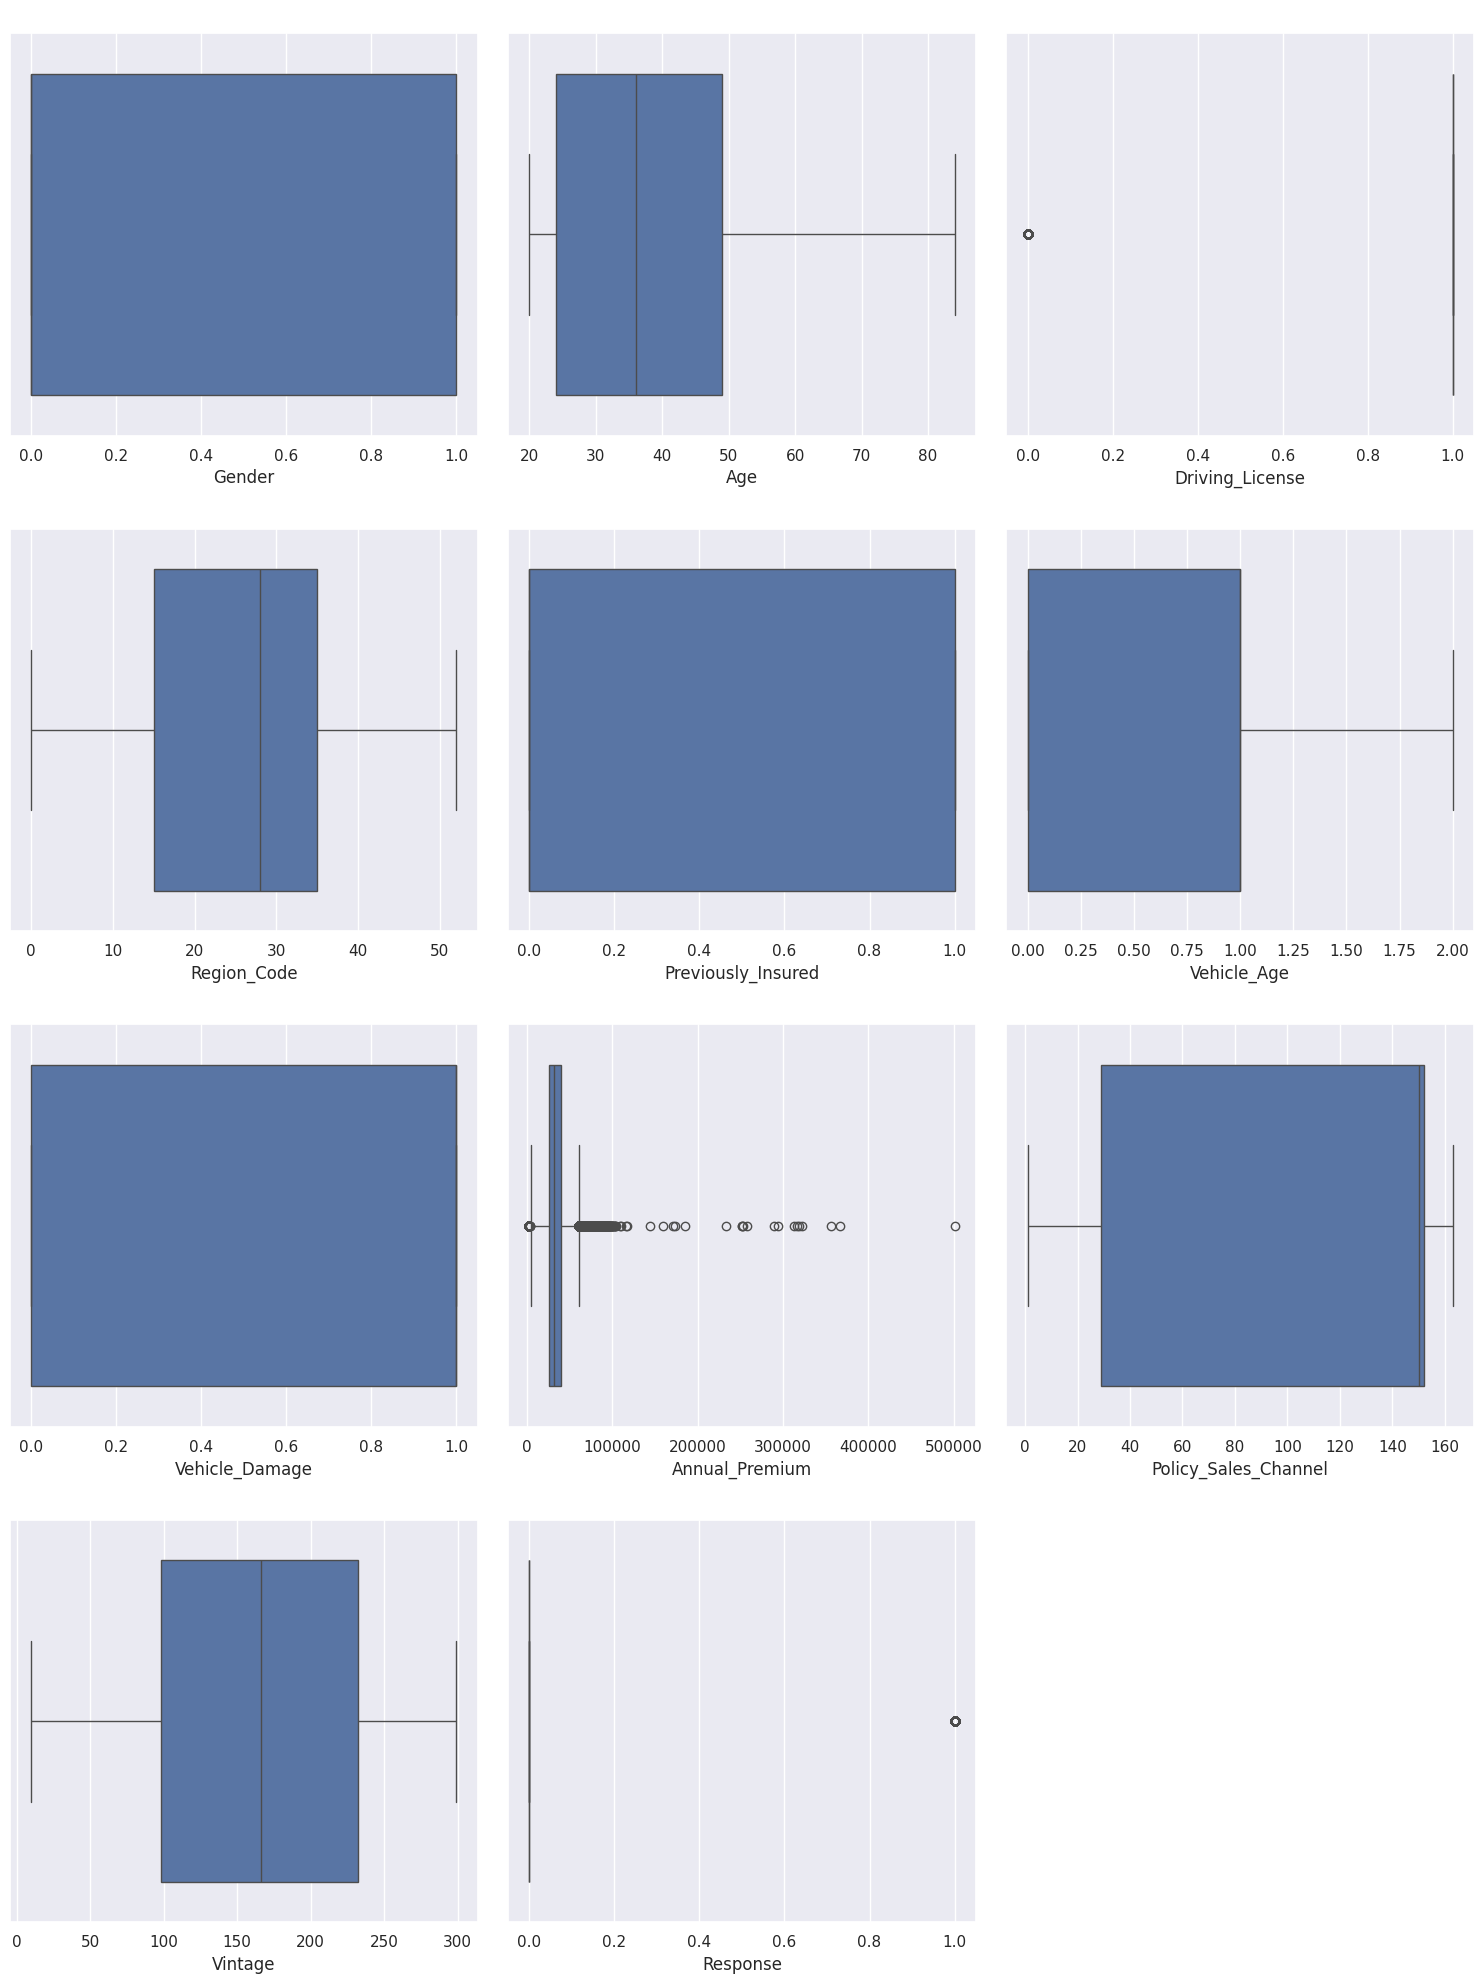

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')

sns.set(style="darkgrid")

columns_to_plot = [
    'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
    'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel',
    'Vintage', 'Response'
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=train[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=14, color='white')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
test.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

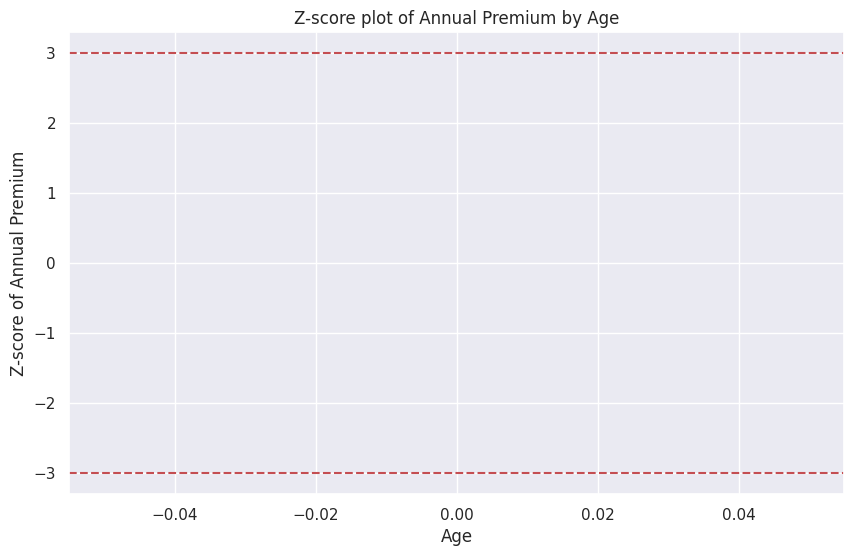

In [19]:
from scipy import stats
import numpy as np


train['Annual_Premium_Z'] = stats.zscore(train['Annual_Premium'])

# We can plot it against any other categorical variable, other than Age to get an idea of outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Age', y='Annual_Premium_Z')
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title('Z-score plot of Annual Premium by Age')
plt.xlabel('Age')
plt.ylabel('Z-score of Annual Premium')
plt.show()

In [20]:
train = train.drop(columns=['Annual_Premium_Z'])

In [21]:
def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}
    for column in df.columns:
        current_column = df[column]
        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()
        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
    return duplicate_columns

In [22]:
duplicate_columns = get_duplicate_columns(train)
duplicate_columns

{}

In [23]:
get_duplicate_columns(test)

{}

In [24]:
def check_duplicates(df, subset=None, remove=False):
    duplicates = df.duplicated(subset=subset)
    duplicate_rows = df[duplicates]
    print("Duplicate Rows:")
    print(duplicate_rows)
    duplicate_count = duplicates.sum()
    print(f"Number of duplicate rows: {duplicate_count}")

    if remove:
        df_no_duplicates = df.drop_duplicates(subset=subset)
        return df_no_duplicates, duplicate_count
    else:
        return df, duplicate_count


df_checked, duplicate_count = check_duplicates(train)
df_checked_specific, duplicate_count_specific = check_duplicates(train, subset=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'], remove=True)

Duplicate Rows:
Empty DataFrame
Columns: [Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []
Number of duplicate rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []
Number of duplicate rows: 0


In [25]:
duplicate_count_specific

0

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150242 entries, 0 to 150241
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                150242 non-null  int64  
 1   Age                   150242 non-null  int64  
 2   Driving_License       150242 non-null  int64  
 3   Region_Code           150242 non-null  float64
 4   Previously_Insured    150242 non-null  int64  
 5   Vehicle_Age           150242 non-null  int64  
 6   Vehicle_Damage        150241 non-null  float64
 7   Annual_Premium        150241 non-null  float64
 8   Policy_Sales_Channel  150241 non-null  float64
 9   Vintage               150241 non-null  float64
 10  Response              150241 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 17.8 MB


In [27]:
train = klib.data_cleaning(train)

Shape of cleaned data: (150242, 11) - Remaining NAs: 5


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 13.63 MB (-76.62%)



In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150242 entries, 0 to 150241
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                150242 non-null  int8   
 1   age                   150242 non-null  int8   
 2   driving_license       150242 non-null  int8   
 3   region_code           150242 non-null  float32
 4   previously_insured    150242 non-null  int8   
 5   vehicle_age           150242 non-null  int8   
 6   vehicle_damage        150241 non-null  float32
 7   annual_premium        150241 non-null  float32
 8   policy_sales_channel  150241 non-null  float32
 9   vintage               150241 non-null  float32
 10  response              150241 non-null  float32
dtypes: float32(6), int8(5)
memory usage: 4.2 MB


In [29]:
train.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,21,1,35.0,0,1,1.0,65101.0,124.0,187.0,0.0
1,0,43,1,28.0,0,2,1.0,58911.0,26.0,288.0,1.0
2,1,25,1,14.0,1,0,0.0,38043.0,152.0,254.0,0.0
3,1,35,1,1.0,0,1,1.0,2630.0,156.0,76.0,0.0
4,1,36,1,15.0,1,1,0.0,31951.0,152.0,294.0,0.0


In [30]:
column_names = {
    'gender': 'Gender',
    'age': 'Age',
    'driving_license': 'Driving_License',
    'region_code': 'Region_Code',
    'previously_insured': 'Previously_Insured',
    'vehicle_age': 'Vehicle_Age',
    'vehicle_damage': 'Vehicle_Damage',
    'annual_premium': 'Annual_Premium',
    'policy_sales_channel': 'Policy_Sales_Channel',
    'vintage': 'Vintage',
    'response': 'Response'
}

train = train.rename(columns=column_names)

In [38]:
train.isnull().sum()

,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,1
Annual_Premium,1
Policy_Sales_Channel,1
Vintage,1


In [31]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,1,1.0,65101.0,124.0,187.0,0.0
1,0,43,1,28.0,0,2,1.0,58911.0,26.0,288.0,1.0
2,1,25,1,14.0,1,0,0.0,38043.0,152.0,254.0,0.0
3,1,35,1,1.0,0,1,1.0,2630.0,156.0,76.0,0.0
4,1,36,1,15.0,1,1,0.0,31951.0,152.0,294.0,0.0


In [32]:
X = train.drop(columns=['Response'])
y = train['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(120193, 10)

In [37]:
X_train.isnull()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
102343,False,False,False,False,False,False,False,False,False,False
40202,False,False,False,False,False,False,False,False,False,False
79092,False,False,False,False,False,False,False,False,False,False
5979,False,False,False,False,False,False,False,False,False,False
127266,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
119879,False,False,False,False,False,False,False,False,False,False
103694,False,False,False,False,False,False,False,False,False,False
131932,False,False,False,False,False,False,False,False,False,False
146867,False,False,False,False,False,False,False,False,False,False


In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Importance using Random Forest

In [44]:
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier

X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

rf = RandomForestClassifier()
rf.fit(X_train_clean, y_train_clean)

fig = go.Figure(
    go.Bar(
        x=rf.feature_importances_,
        y=X_train.columns,
        orientation='h',
        marker_color='steelblue'
    )
)

fig.update_layout(
    template='plotly_dark',
    title='<b>Estimating feature importance through the Random Forest model',
    title_x=0.5,
    xaxis_title="Feature importance",
    yaxis_title='Feature'
)

fig.show()

,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


In [43]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


In [51]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

df_models = pd.DataFrame(columns=['Algorithm', 'AUC_train', 'AUC_test'])

def make_model(X_train, X_test, y_train, y_test, model, model_name: str):
    model.fit(X_train, y_train)
    y_pred_train_proba = model.predict_proba(X_train)[:, 1]
    y_pred_test_proba = model.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_pred_train_proba)
    auc_test = roc_auc_score(y_test, y_pred_test_proba)
    df_models.loc[len(df_models.index)] = [model_name, auc_train, auc_test]

make_model(X_train_clean, X_test, y_train_clean, y_test, GradientBoostingClassifier(), 'GradientBoosting')
make_model(X_train_clean, X_test, y_train_clean, y_test, RandomForestClassifier(), 'RandomForest')
make_model(X_train_clean, X_test, y_train_clean, y_test, XGBClassifier(), 'XGBoost')
make_model(X_train_clean, X_test, y_train_clean, y_test, CatBoostClassifier(), 'CatBoost')
make_model(X_train_clean, X_test, y_train_clean, y_test, LGBMClassifier(), 'LGBM')

fig = go.Figure(data=[
    go.Bar(name='AUC_train', x=df_models.Algorithm, y=df_models.AUC_train),
    go.Bar(name='AUC_test', x=df_models.Algorithm, y=df_models.AUC_test)
])

fig.update_layout(template='plotly_dark', title='AUC for train and test', title_x=0.5)

Learning rate set to 0.079623
0:	learn: 0.5504755	total: 27.3ms	remaining: 27.3s
1:	learn: 0.4587036	total: 52.2ms	remaining: 26s
2:	learn: 0.4304612	total: 77.7ms	remaining: 25.8s
3:	learn: 0.3805129	total: 105ms	remaining: 26.2s
4:	learn: 0.3489937	total: 132ms	remaining: 26.2s
5:	learn: 0.3277673	total: 158ms	remaining: 26.1s
6:	learn: 0.3131696	total: 184ms	remaining: 26.1s
7:	learn: 0.3027851	total: 234ms	remaining: 29s
8:	learn: 0.2957669	total: 261ms	remaining: 28.7s
9:	learn: 0.2902372	total: 287ms	remaining: 28.4s
10:	learn: 0.2860713	total: 325ms	remaining: 29.2s
11:	learn: 0.2827422	total: 351ms	remaining: 28.9s
12:	learn: 0.2803497	total: 376ms	remaining: 28.5s
13:	learn: 0.2783412	total: 402ms	remaining: 28.3s
14:	learn: 0.2766475	total: 428ms	remaining: 28.1s
15:	learn: 0.2753773	total: 457ms	remaining: 28.1s
16:	learn: 0.2738596	total: 487ms	remaining: 28.1s
17:	learn: 0.2728552	total: 518ms	remaining: 28.3s
18:	learn: 0.2716996	total: 570ms	remaining: 29.4s
19:	learn: 0

In [52]:
df_models

,Algorithm,AUC_train,AUC_test
0,GradientBoosting,0.865455,0.864935
1,RandomForest,1.000000,0.846021
2,XGBoost,0.909842,0.868707
3,CatBoost,0.902024,0.871435
4,LGBM,0.885930,0.870550


In [54]:
df_models.sort_values(by='AUC_train', ascending=False)

,Algorithm,AUC_train,AUC_test
1,RandomForest,1.000000,0.846021
2,XGBoost,0.909842,0.868707
3,CatBoost,0.902024,0.871435
4,LGBM,0.885930,0.870550
0,GradientBoosting,0.865455,0.864935


In [55]:
df_models.sort_values(by='AUC_test', ascending=False)

,Algorithm,AUC_train,AUC_test
3,CatBoost,0.902024,0.871435
4,LGBM,0.885930,0.870550
2,XGBoost,0.909842,0.868707
0,GradientBoosting,0.865455,0.864935
1,RandomForest,1.000000,0.846021


In [57]:
X_final = X.dropna()
y_final = y[X_final.index]

In [58]:
rf = RandomForestRegressor()
rf.fit(X_final, y_final)

RandomForestRegressor()

In [60]:
test_X = pd.read_csv('test.csv')

In [ ]:
y_pred_test_proba = rf.predict_proba(X_test)[:, 1]

submission_df = pd.DataFrame({
    'id': X_test['id'],
    'Response': y_pred_test_proba
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully.")